In [1]:
import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
import torch
from models.phrase_vae import load_t5_model_from_lit_ckpt, S2SVAE
from models.vae_inference import MQVAE


model = MQVAE()

/home/longshen/programs/miniconda3/envs/accgen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using compress_style: first_n_tokens


In [2]:
# Prepare tokenizer
from transformers import PreTrainedTokenizerFast
tokenizer_path = 'LongshenOu/phrase-vae-tokenizer'
tok = PreTrainedTokenizerFast.from_pretrained(tokenizer_path)

In [3]:
# Prepare data
from sonata_utils import read_jsonl
jsonl_fp = '/home/longshen/work/AccGen/AccGen/data_preprocess/POP909/statistics/unique_piano_bars.jsonl'
data = read_jsonl(jsonl_fp)
bar1 = data[8]
bar2 = data[108]
print(bar1)
print(bar2)

i-0 o-0 p-30 d-6 o-3 p-66 d-3 p-61 d-3 o-6 p-30 d-3 o-9 p-54 d-3 o-12 p-66 d-3 p-61 d-3 p-30 d-3 o-15 p-54 d-3 o-18 p-66 d-3 p-61 d-3 p-30 d-3 o-21 p-57 d-3 p-30 d-3 o-24 p-66 d-9 p-62 d-9 p-57 d-9 p-38 d-18 p-26 d-6 o-30 p-26 d-6 o-33 p-50 d-6 o-36 p-66 d-6 p-62 d-6 p-57 d-6 p-26 d-3 o-42 p-50 d-6 p-26 d-6 b-1
i-0 o-0 p-35 d-21 o-3 p-42 d-18 o-6 p-47 d-6 o-9 p-54 d-6 o-12 p-63 d-12 o-15 p-47 d-3 o-18 p-59 d-6 o-21 p-54 d-3 o-24 p-34 d-21 o-27 p-51 d-3 o-30 p-54 d-3 o-33 p-51 d-3 o-36 p-61 d-12 o-39 p-51 d-3 o-42 p-54 d-6 o-45 p-51 d-3 b-1


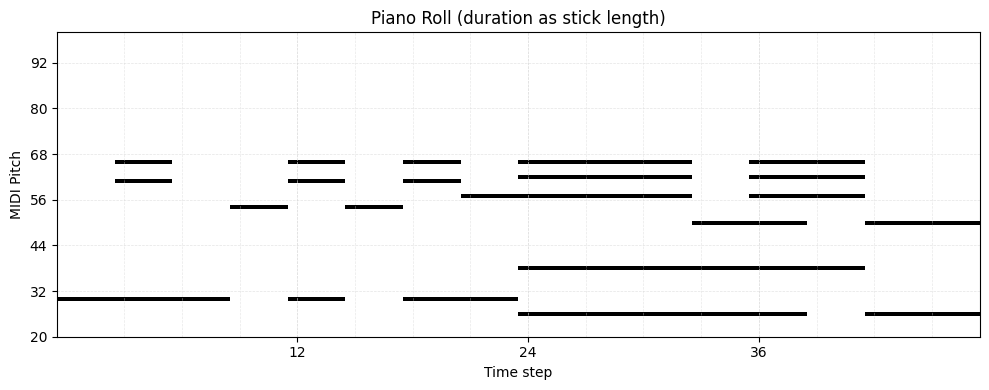

In [4]:
# Draw the two bars
from piano_roll_utils import save_piano_roll
from remi_z import MultiTrack

bar1_mt = MultiTrack.from_remiz_str(bar1)[0]
proll1 = bar1_mt.to_piano_roll(pos_per_bar=48)
save_piano_roll(proll1, 'bar1.png', show=True)

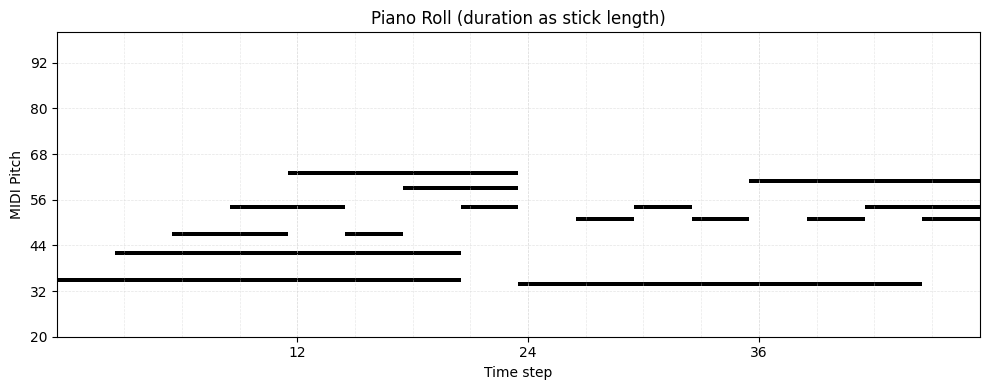

In [5]:
bar2_mt = MultiTrack.from_remiz_str(bar2)[0]
proll2 = bar2_mt.to_piano_roll(pos_per_bar=48)
save_piano_roll(proll2, 'bar2.png', show=True)  

In [6]:
latents = model.encode_batch([bar1, bar2], do_sample=False)
print(latents.shape)

torch.Size([2, 4, 512])


o-0 p-30 d-6 o-3 p-66 d-3 p-61 d-3 o-6 p-30 d-3 o-9 p-54 d-3 o-12 p-66 d-3 p-61 d-3 p-30 d-3 o-15 p-54 d-3 o-18 p-66 d-3 p-61 d-3 p-30 d-3 o-21 p-57 d-3 p-30 d-3 o-24 p-66 d-9 p-62 d-9 p-57 d-9 p-38 d-18 p-26 d-6 o-30 p-26 d-6 o-33 p-50 d-6 o-36 p-66 d-6 p-62 d-6 p-57 d-6 p-26 d-3 o-42 p-50 d-6 p-26 d-6 b-1
o-0 p-35 d-21 o-3 p-42 d-18 o-6 p-47 d-6 o-9 p-54 d-6 o-12 p-63 d-12 o-15 p-47 d-3 o-18 p-59 d-6 o-21 p-54 d-3 o-24 p-34 d-21 o-27 p-51 d-3 o-30 p-54 d-3 o-33 p-51 d-3 o-36 p-61 d-12 o-39 p-51 d-3 o-42 p-54 d-6 o-45 p-51 d-3 b-1
i-0 o-0 p-30 d-6 o-3 p-66 d-3 p-61 d-3 o-6 p-30 d-3 o-9 p-54 d-3 o-12 p-66 d-3 p-61 d-3 p-30 d-3 o-15 p-54 d-3 o-18 p-66 d-3 p-61 d-3 p-30 d-3 o-21 p-57 d-3 p-30 d-3 o-24 p-66 d-9 p-62 d-9 p-57 d-9 p-38 d-18 p-26 d-6 o-30 p-26 d-6 o-33 p-50 d-6 o-36 p-66 d-6 p-62 d-6 p-57 d-6 p-26 d-3 o-42 p-50 d-6 p-26 d-6 b-1
i-0 o-0 p-35 d-21 o-3 p-42 d-18 o-6 p-47 d-6 o-9 p-54 d-6 o-12 p-63 d-12 o-15 p-47 d-3 o-18 p-59 d-6 o-21 p-54 d-3 o-24 p-34 d-21 o-27 p-51 d-3 o-30 

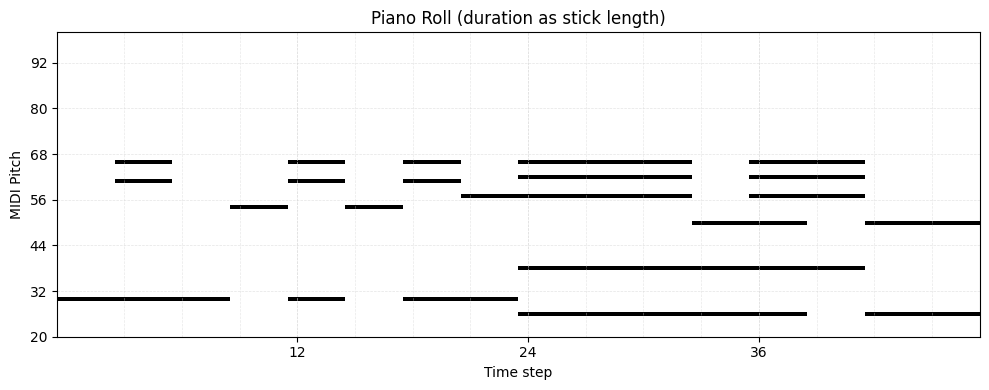

MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/bar1_recon.mid


In [7]:
from sonata_utils import jpath

# Check piano roll reconstruction
recon_str = model.decode_batch(latents)
print(recon_str[0])
print(recon_str[1])
recon_mts = model.decode_batch(latents, return_mt=True)
proll1_rec = recon_mts[0][0].to_piano_roll(pos_per_bar=48)
proll2_rec = recon_mts[1][0].to_piano_roll(pos_per_bar=48)
bar1_rec = recon_mts[0]
bar2_rec = recon_mts[1]

print(bar1_rec.to_remiz_str())
print(bar2_rec.to_remiz_str())

save_piano_roll(proll1_rec, 'bar1_rec.png', show=True)
save_dir = '/home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate'
save_fp = jpath(save_dir, 'bar1_recon.mid')
bar1_rec.to_midi(save_fp, tempo=90)


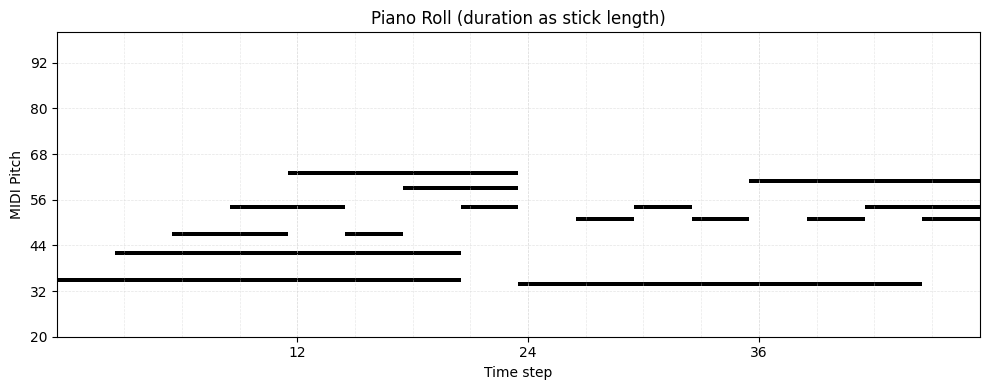

MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/bar2_recon.mid


In [8]:
# Check reconstructed proll2
save_piano_roll(proll2_rec, 'bar2_rec.png', show=True)
save_fp = jpath(save_dir, 'bar2_recon.mid')
bar2_rec.to_midi(save_fp, tempo=90)

torch.Size([4, 512]) torch.Size([4, 512])


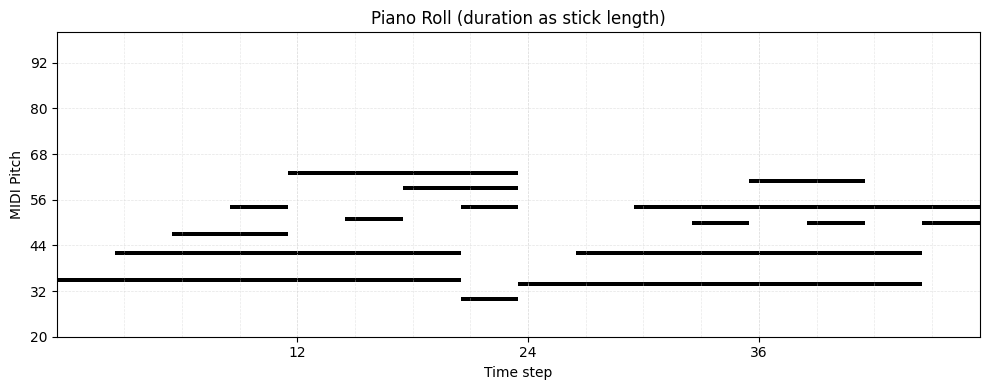

MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/bar_avg.mid


In [9]:
# Average the two latents
latents1 = latents[0]
latents2 = latents[1]
print(latents1.shape, latents2.shape)
latents_avg = (latents1 + latents2) / 2
mt_avg = model.decode_batch(latents_avg.unsqueeze(0), return_mt=True)[0]
proll_avg = mt_avg[0].to_piano_roll(pos_per_bar=48)
save_piano_roll(proll_avg, 'bar_avg.png', show=True)
save_fp = jpath(save_dir, 'bar_avg.mid')
mt_avg.to_midi(save_fp, tempo=90)

In [10]:
# Weighted interpolation
save_dir = '/home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1'
weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
proll_save_dir = jpath(save_dir, 'prolls')
os.makedirs(proll_save_dir, exist_ok=True)
latents1 = latents[0]
latents2 = latents[1]
for w in weights:
    latents_interp = (1-w) * latents1 + w * latents2
    mt_interp = model.decode_batch(latents_interp.unsqueeze(0), return_mt=True)[0]
    proll_interp = mt_interp[0].to_piano_roll(pos_per_bar=48)
    proll_fp = jpath(proll_save_dir, f'bar_interp_w{w:.1f}.png')
    save_piano_roll(proll_interp, proll_fp, show=False)
    midi_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.mid')
    mt_interp.to_midi(midi_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.0.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.1.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.2.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.3.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.4.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.5.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.6.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/interpolate/pair1/bar_interp_w0.7.mid
MIDI file succes

In [13]:
# Do for another pair
from sonata_utils import create_dir_if_not_exist
# random select two bar ids
import numpy as np
id1 = np.random.randint(0, len(data))
id2 = np.random.randint(0, len(data))
bar3 = data[id1]
bar4 = data[id2]
save_dir = '/home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4'
create_dir_if_not_exist(save_dir)

new_latents = model.encode_batch([bar3, bar4], do_sample=False)
bar3_latents = new_latents[0]
bar4_latents = new_latents[1]

weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for w in weights:
    latents_interp = (1-w) * bar3_latents + w * bar4_latents
    mt_interp = model.decode_batch(latents_interp.unsqueeze(0), return_mt=True)[0]
    proll_interp = mt_interp[0].to_piano_roll(pos_per_bar=48)
    proll_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.png')
    midi_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.mid')
    save_piano_roll(proll_interp, proll_fp, show=False)
    mt_interp.to_midi(midi_fp, tempo=90)

Using mean as latent, no sampling
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.0.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.1.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.2.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.3.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.4.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.5.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.6.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/tests/vae_out/interpolate/pair4/bar_interp_w0.7.mid
MIDI f

In [ ]:
# Sample directly
from sonata_utils import create_dir_if_not_exist
save_dir = '/home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428'
create_dir_if_not_exist(save_dir)
z_random = torch.randn(10, 4, 512)
scale_factor = 0.3428
z_random = z_random * scale_factor
mts = model.decode_batch(z_random, return_mt=True)
for i, mt in enumerate(mts):
    proll = mt[0].to_piano_roll(pos_per_bar=48)
    save_piano_roll(proll, jpath(save_dir, f'bar_sample_{i}.png'))
    save_fp = jpath(save_dir, f'bar_sample_{i}.mid')
    mt.to_midi(save_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_0.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_1.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_2.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_3.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_4.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_5.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_6.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_std0.3428/bar_sample_7.mid
MIDI fil

In [ ]:
import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
import torch
from models.phrase_vae import load_t5_model_from_lit_ckpt, S2SVAE
from piano_roll_utils import save_piano_roll
from models.vae_inference import MQVAE
from sonata_utils import jpath


model = MQVAE()

# Sample directly
from sonata_utils import create_dir_if_not_exist
save_dir = '/home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test'
create_dir_if_not_exist(save_dir)
z_random = torch.randn(10, 4, 512)
scale_factor = 0.2595
mts = model.decode_batch(z_random, return_mt=True, scale_factor=scale_factor)
for i, mt in enumerate(mts):
    proll = mt[0].to_piano_roll(pos_per_bar=48)
    save_piano_roll(proll, jpath(save_dir, f'bar_sample_{i}.png'))
    save_fp = jpath(save_dir, f'bar_sample_{i}.mid')
    mt.to_midi(save_fp, tempo=90)

Using compress_style: first_n_tokens
Adaptive scale: False
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_0.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_1.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_2.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_3.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_4.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_5.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sample_6.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_test/bar_sa

In [1]:
# Evaluate new VAE
import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
import torch
from models.phrase_vae import load_t5_model_from_lit_ckpt, S2SVAE
from piano_roll_utils import save_piano_roll
from models.vae_inference import MQVAE
from sonata_utils import jpath


model = MQVAE(ckpt_fp='/data1/longshen/Results/AccGenResults/bar_compression/pop909_phrase/s2s/mqcomp_vae/aeft_lr1e-4_klw1.0/tb_logs/version_0/checkpoints/epoch=107_step=52272_val_loss=0.1351.ckpt')

# Sample directly
from sonata_utils import create_dir_if_not_exist
save_dir = '/home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data'
create_dir_if_not_exist(save_dir)
z_random = torch.randn(10, 4, 512)
scale_factor = 0.3294
mts = model.decode_batch(z_random, return_mt=True, scale_factor=scale_factor)
for i, mt in enumerate(mts):
    proll = mt[0].to_piano_roll(pos_per_bar=48)
    save_piano_roll(proll, jpath(save_dir, f'bar_sample_{i}.png'))
    save_fp = jpath(save_dir, f'bar_sample_{i}.mid')
    mt.to_midi(save_fp, tempo=90)

/home/longshen/programs/miniconda3/envs/accgen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using compress_style: first_n_tokens
Adaptive scale: False
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_0.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_1.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_2.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_3.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_4.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccGen/test_outputs/vae/sample_from_normal/trained_with_phrase_data/bar_sample_5.mid
MIDI file successfully written to /home/longshen/work/AccGen/AccG

In [1]:
# Evaluate VAE with bottleneck
import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
import torch
from models.phrase_vae import load_t5_model_from_lit_ckpt, S2SVAE
from piano_roll_utils import save_piano_roll
from models.vae_inference import MQVAE
from sonata_utils import jpath


model = MQVAE(bottleneck=True, ckpt_fp='/data1/longshen/Results/AccGenResults/aes/pos_level/pop909_phrase_flatten/mqcomp_vae_bottleneck/b128/tb_logs/version_0/checkpoints/epoch=1_step=9378_val_loss=0.2529.ckpt')

# Sample directly
from sonata_utils import create_dir_if_not_exist
save_dir = '/home/longshen/work/AccGen/AccGen/test_outputs/vae/pos_level/sample_from_normal'
create_dir_if_not_exist(save_dir)
z_random = torch.randn(10, 1, 512)
scale_factor = 0.2595
mts = model.decode_batch(z_random, return_mt=True, scale_factor=scale_factor)
for i, mt in enumerate(mts):
    proll = mt[0].to_piano_roll(pos_per_bar=48)
    save_piano_roll(proll, jpath(save_dir, f'bar_sample_{i}.png'))
    save_fp = jpath(save_dir, f'bar_sample_{i}.mid')
    mt.to_midi(save_fp, tempo=90)

/home/longshen/programs/miniconda3/envs/accgen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using compress_style: first_n_tokens
Adaptive scale: False


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x512 and 128x512)